<a href="https://colab.research.google.com/github/nildodnjunior/mestrado_comp_ifes_ml/blob/master/aula1a_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
X, y = data['data'], data['target']
X2 = X[:,2:3]

In [ ]:
# mean absolute error
def mae(y, ypred):
  ydiff = ypred - y.reshape(-1,1)
  yabs = abs(ydiff)
  sumerror = sum(yabs)
  mae = sumerror/len(yabs)
  return mae

In [ ]:
# mean squared error
def mse(y, ypred):
  ydiff = ypred - y.reshape(-1,1)
  ydiffsquare = ydiff**2
  sumerror = sum(ydiffsquare)
  mse = sumerror/len(ydiffsquare)
  return mse

In [ ]:
from math import sqrt
# root mean squared error
def rmse(y, ypred):
  rmse = sqrt(mse(y, ypred))
  return rmse

In [ ]:
from sklearn.metrics import mean_squared_error

3898.0787360742534


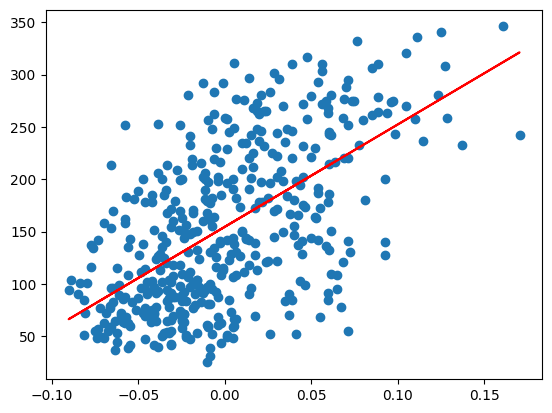

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# X2, y = make_regression(n_samples=442, n_features=1, noise=20)
X_treino, X_teste, y_treino, y_teste = train_test_split(X2, y, test_size=0.2, random_state=20)

def addBias(X):
    bias  = np.ones((X.shape[0], 1))
    X_b = np.concatenate((bias, X), axis=1)
    return X_b

class regressao_linear():
    def fit(self, X, y):
        X_b = addBias(X)
        self.w = np.random.uniform(size=(X_b.shape[1],1))
        for _ in range(50000):
            ypred = X_b.dot(self.w)
            error = ypred - y.reshape(-1, 1)
            # ajuste = X_b.T.dot(error)/sum(X_b).reshape(-1,1)
            ajuste = X_b.T.dot(error)/len(y)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = addBias(X)
        y = X_b.dot(self.w)
        return y


plt.scatter(X2, y)

modelo = regressao_linear()
modelo.fit(X_treino, y_treino)

print(mean_squared_error(y, modelo.predict(X2)))

plt.plot(X2, modelo.predict(X2), 'r')

plt.show()